# <center>*HUFF MODEL APPLICATION IN STORE ANALYSIS*</center>

## 1) Huff model introduction

In spatial analysis, the Huff model is a widely used tool for predicting the probability of a consumer visiting a site, as a function of the distance of the site, its attractiveness, and the relative attractiveness of alternatives. It was formulated by David Huff in 1963. t is used in marketing, economics, retail research and urban planning, and is implemented in several commercially available GIS systems.

<underline>The formula is given as:</underline>

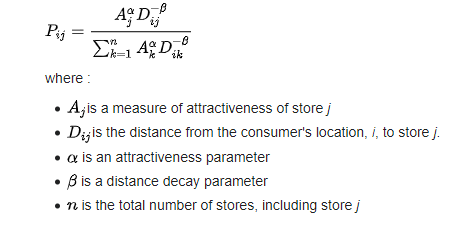

## 2) Import packages and data cleaning

In [81]:
#import packages
import numpy as np
import pandas as pd

In [82]:
#import data
xls = pd.ExcelFile('Python_trade.xlsx')

In [83]:
#first sheet
distance = xls.parse(0, index_col=0)
distance.head()

,Rosmere,saint-rose,Laval de Rapides,Boisbraind
customer community,,,,
Blainville,30,70,130,40
Boisbrand,20,20,110,1
Saint therese,20,40,130,20
Fabre villee,50,20,40,40
Laval de Rapides,80,70,1,80


In [84]:
distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Blainville to Deux Montagnes
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Rosmere           9 non-null      int64
 1   saint-rose        9 non-null      int64
 2   Laval de Rapides  9 non-null      int64
 3   Boisbraind        9 non-null      int64
dtypes: int64(4)
memory usage: 360.0+ bytes


In [85]:
distance.describe()

,Rosmere,saint-rose,Laval de Rapides,Boisbraind
count,9.000000,9.000000,9.000000,9.000000
mean,66.666667,60.000000,75.666667,62.333333
std,47.958315,27.386128,50.586559,37.802116
min,20.000000,20.000000,1.000000,1.000000
25%,30.000000,40.000000,40.000000,40.000000
50%,50.000000,70.000000,90.000000,80.000000
75%,100.000000,70.000000,120.000000,100.000000
max,150.000000,100.000000,130.000000,100.000000


In [86]:
#second sheet
census = xls.parse(1, index_col=1)
census.head()

,customer community,Expenditure grocery
Households,,
4000,Blainville,800
8000,Boisbrand,1000
12000,Saint therese,1100
6000,Fabre villee,700
1000,Laval de Rapides,1200


In [87]:
census['Total'] = census.index * census['Expenditure grocery']
census.head()

,customer community,Expenditure grocery,Total
Households,,,
4000,Blainville,800,3200000
8000,Boisbrand,1000,8000000
12000,Saint therese,1100,13200000
6000,Fabre villee,700,4200000
1000,Laval de Rapides,1200,1200000


In [88]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 4000 to 4000
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer community   9 non-null      object
 1   Expenditure grocery  9 non-null      int64 
 2   Total                9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 288.0+ bytes


In [89]:
census.describe()

,Expenditure grocery,Total
count,9.000000,9.000000e+00
mean,922.222222,5.522222e+06
std,281.858909,3.475909e+06
min,500.000000,1.200000e+06
25%,700.000000,3.500000e+06
50%,900.000000,4.500000e+06
75%,1100.000000,6.300000e+06
max,1400.000000,1.320000e+07


In [90]:
attractiveness = xls.parse(2, index_col=0)
attractiveness.head()

,Size,Parking spaces,Highways,Traffic,Accessibility,Design
customer community,,,,,,
Rosmere,1000,200,4,4,10,7
saint-rose,1100,150,2,8,7,7
Laval de Rapides,800,120,3,2,8,6
Boisbraind,1300,220,5,6,5,10


In [91]:
attractiveness.describe()

,Size,Parking spaces,Highways,Traffic,Accessibility,Design
count,4.0000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1050.0000,172.500000,3.500000,5.000000,7.500000,7.500000
std,208.1666,45.734742,1.290994,2.581989,2.081666,1.732051
min,800.0000,120.000000,2.000000,2.000000,5.000000,6.000000
25%,950.0000,142.500000,2.750000,3.500000,6.500000,6.750000
50%,1050.0000,175.000000,3.500000,5.000000,7.500000,7.000000
75%,1150.0000,205.000000,4.250000,6.500000,8.500000,7.750000
max,1300.0000,220.000000,5.000000,8.000000,10.000000,10.000000


## 3) Data cleaning

In [99]:
census.reset_index(inplace=True)
census.set_index('customer community', inplace=True)
census.head()

,Households,Expenditure grocery,Total
customer community,,,
Blainville,4000,800,3200000
Boisbrand,8000,1000,8000000
Saint therese,12000,1100,13200000
Fabre villee,6000,700,4200000
Laval de Rapides,1000,1200,1200000


In [57]:
stores = np.unique(attractiveness.index)
commu = np.unique(distance.index)

In [58]:
keys = [(x,y) for x in commu for y in stores]

In [59]:
scaled = (attractiveness - attractiveness.min())/(attractiveness.max() - attractiveness.min())

In [60]:
scaled.columns

Index(['Size', 'Parking spaces', 'Highways', 'Traffic', 'Accessibility',
       'Design'],
      dtype='object')

In [61]:
scaled['attractiveness'] = (scaled['Size'] + scaled['Parking spaces'] + scaled['Highways']
                           + scaled['Traffic'] + scaled['Accessibility'] + scaled['Design'])

In [62]:
neum = {}

for key in keys:
    neum[key] = scaled.loc[key[1], 'attractiveness']/distance.loc[key[0],key[1]]

neum

{('Blainville', 'Boisbraind'): 0.11666666666666665,
 ('Blainville', 'Laval de Rapides'): 0.0071794871794871795,
 ('Blainville', 'Rosmere'): 0.115,
 ('Blainville', 'saint-rose'): 0.03642857142857143,
 ('Boisbrand', 'Boisbraind'): 4.666666666666666,
 ('Boisbrand', 'Laval de Rapides'): 0.008484848484848486,
 ('Boisbrand', 'Rosmere'): 0.17250000000000001,
 ('Boisbrand', 'saint-rose'): 0.1275,
 ('Carterville', 'Boisbraind'): 0.04666666666666666,
 ('Carterville', 'Laval de Rapides'): 0.04666666666666667,
 ('Carterville', 'Rosmere'): 0.02875,
 ('Carterville', 'saint-rose'): 0.031875,
 ('Deux Montagnes', 'Boisbraind'): 0.04666666666666666,
 ('Deux Montagnes', 'Laval de Rapides'): 0.01037037037037037,
 ('Deux Montagnes', 'Rosmere'): 0.023,
 ('Deux Montagnes', 'saint-rose'): 0.0255,
 ('Fabre villee', 'Boisbraind'): 0.11666666666666665,
 ('Fabre villee', 'Laval de Rapides'): 0.023333333333333334,
 ('Fabre villee', 'Rosmere'): 0.069,
 ('Fabre villee', 'saint-rose'): 0.1275,
 ('Laval de Rapides', '

In [65]:
## numerator
Pijs = {}

for key in keys:
    Pijs[key] = neum[key]/sum([v for k,v in neum.items() if k[0] == key[0]])
    
Pijs

{('Blainville', 'Boisbraind'): 0.42381902860944776,
 ('Blainville', 'Laval de Rapides'): 0.026081170991350634,
 ('Blainville', 'Rosmere'): 0.4177644710578843,
 ('Blainville', 'saint-rose'): 0.1323353293413174,
 ('Boisbrand', 'Boisbraind'): 0.9379948836642708,
 ('Boisbrand', 'Laval de Rapides'): 0.0017054452430259471,
 ('Boisbrand', 'Rosmere'): 0.0346723108783043,
 ('Boisbrand', 'saint-rose'): 0.02562736021439883,
 ('Carterville', 'Boisbraind'): 0.30311231393775373,
 ('Carterville', 'Laval de Rapides'): 0.3031123139377538,
 ('Carterville', 'Rosmere'): 0.1867388362652233,
 ('Carterville', 'saint-rose'): 0.20703653585926932,
 ('Deux Montagnes', 'Boisbraind'): 0.442182839094578,
 ('Deux Montagnes', 'Laval de Rapides'): 0.09826285313212844,
 ('Deux Montagnes', 'Rosmere'): 0.21793297069661346,
 ('Deux Montagnes', 'saint-rose'): 0.24162133707668013,
 ('Fabre villee', 'Boisbraind'): 0.34670629024269434,
 ('Fabre villee', 'Laval de Rapides'): 0.06934125804853888,
 ('Fabre villee', 'Rosmere'): 0

In [103]:
## expected per key
exp_key = {}
census
for key in keys:
    exp_key[key] = Pijs[key] * census.loc[key[0], 'Total']
    
exp_key

{('Blainville', 'Boisbraind'): 1356220.891550233,
 ('Blainville', 'Laval de Rapides'): 83459.74717232204,
 ('Blainville', 'Rosmere'): 1336846.3073852297,
 ('Blainville', 'saint-rose'): 423473.05389221566,
 ('Boisbrand', 'Boisbraind'): 7503959.069314166,
 ('Boisbrand', 'Laval de Rapides'): 13643.561944207577,
 ('Boisbrand', 'Rosmere'): 277378.4870264344,
 ('Boisbrand', 'saint-rose'): 205018.88171519066,
 ('Carterville', 'Boisbraind'): 1909607.5778078486,
 ('Carterville', 'Laval de Rapides'): 1909607.5778078488,
 ('Carterville', 'Rosmere'): 1176454.6684709068,
 ('Carterville', 'saint-rose'): 1304330.1759133968,
 ('Deux Montagnes', 'Boisbraind'): 2476223.898929637,
 ('Deux Montagnes', 'Laval de Rapides'): 550271.9775399193,
 ('Deux Montagnes', 'Rosmere'): 1220424.6359010355,
 ('Deux Montagnes', 'saint-rose'): 1353079.4876294087,
 ('Fabre villee', 'Boisbraind'): 1456166.4190193163,
 ('Fabre villee', 'Laval de Rapides'): 291233.28380386333,
 ('Fabre villee', 'Rosmere'): 861218.4249628528,
 

In [111]:
exp_store = {}

for store in stores:
    exp_store[store] = sum([v for k,v in exp_key.items() if k[1] == store])
    
exp_store

{'Boisbraind': 23593415.143080294,
 'Laval de Rapides': 4832909.21572162,
 'Rosmere': 12932284.93351892,
 'saint-rose': 8341390.707679166}